In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

main_directory = Path.cwd().parent.as_posix()

In [223]:
zoopla_df = pd.read_csv(f"{main_directory}/databases/zooplai.csv")

In [224]:
print(len(zoopla_df))
zoopla_df.head(4)

15920


,title,address,price,station,beds,baths,receptions
0,2 bed flat for sale,"Chorley New Road, Heaton, Bolton - Over 55's D...","£140,000",0.7 miles Lostock,2,1,1
1,2 bed semi-detached house for sale,"Harris Avenue, Denton, Manchester M34","£230,000",0.4 miles Denton,2,0,0
2,3 bed detached bungalow for sale,"Gidlow Lane, Springfield, Wigan WN6","£300,000",1 miles Wigan Wallgate,3,2,2
3,2 bed semi-detached house for sale,"Gordon Avenue, Ashton-In-Makerfield, Wigan WN4","£140,000",0.4 miles Garswood,2,1,1


In [225]:
def clean_type(zoopla_df):
    zoopla_clean = zoopla_df.copy()
    #Remove words and all numbers from the title so we get only the property type 
    zoopla_clean['title'] = zoopla_clean['title'].str.replace('for sale','')
    zoopla_clean['title'] = zoopla_clean['title'].str.replace('bed','')
    zoopla_clean['title'] = zoopla_clean['title'].str.replace('house','')
    zoopla_clean['title'] = zoopla_clean['title'].str.replace('\d+','', regex=True)
    #Remove trailing spaces etc...
    zoopla_clean['title'] = zoopla_clean['title'].str.strip()
    #Everything lower case
    zoopla_clean['title'] = zoopla_clean['title'].apply(lambda x: x.lower())

    #Define the properties to keep for analysis
    property_types_to_keep = ["flat","terraced","semi-detached","detached","end terrace"]
    zoopla_clean = zoopla_clean[zoopla_clean['title'].isin(property_types_to_keep)]

    #Change name of column
    zoopla_clean = zoopla_clean.rename({'title': 'type'}, axis='columns')

    return zoopla_clean

def clean_price(zoopla_df):
    zoopla_clean = zoopla_df.copy()
    #Clean the price column and change it to a numeric type
    zoopla_clean['price'] = zoopla_clean['price'].str.replace('£','')
    zoopla_clean['price'] = zoopla_clean['price'].str.replace(',','')
    #Drop the row if we can not convert to a numeric type. This normally means that the property is POA (Price on application)
    zoopla_clean['price'] = pd.to_numeric(zoopla_clean['price'], errors='coerce')
    zoopla_clean.dropna()

    return zoopla_clean

def get_dist_to_station(zoopla_df):
    zoopla_clean = zoopla_df.copy()
    #Remove all alphabetic entries from the station column -> to extract only the distance to the station from the property
    zoopla_clean['station'] = zoopla_clean['station'].str.replace('[a-zA-z]+','',regex=True)
    zoopla_clean['station'] = pd.to_numeric(zoopla_clean['station'], errors='coerce')

    return zoopla_clean

In [226]:
zoopla_clean = clean_type(zoopla_df)
zoopla_clean = clean_price(zoopla_clean)
zoopla_clean = get_dist_to_station(zoopla_clean)


zoopla_clean['address'] = zoopla_clean['address'].str.rsplit(',').str[-1]
zoopla_clean['post_code']=zoopla_clean['address'].apply(lambda x: x.split(" ")[-1])
zoopla_clean['address']=zoopla_clean['address'].apply(lambda x: join(x.split(' ')[:-1])

In [227]:
print(len(zoopla_clean))
zoopla_clean.head(4)

13971


,type,address,price,station,beds,baths,receptions,post_code
0,flat,"[, Bolton, -, Over, 55's, Development]",140000.0,0.7,2,1,1,BL1
1,semi-detached,"[, Manchester]",230000.0,0.4,2,0,0,M34
3,semi-detached,"[, Wigan]",140000.0,0.4,2,1,1,WN4
4,semi-detached,"[, Bolton]",180000.0,0.6,3,1,2,BL4


In [228]:
zoopla_clean['type'].value_counts()

flat             9071
terraced         1797
semi-detached    1662
detached          953
end terrace       488
Name: type, dtype: int64

<AxesSubplot:>

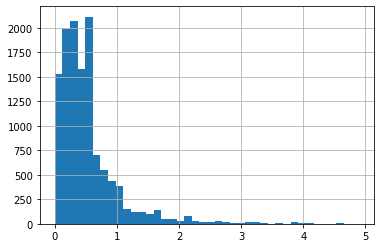

In [229]:
zoopla_clean['station'].hist(bins=40)